In [0]:
#No pude llegar a ningun modelo util

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiagobalay","key":"cf328dfdf1ce2bd815e2d1906dfdc1f5"}'}

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

 91% 60.0M/66.0M [00:01<00:00, 57.5MB/s]
100% 66.0M/66.0M [00:01<00:00, 56.9MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [174]:
#Antes de hacer nada la idea de hacer undersampling me parece horrenda. Entrenar una red neuronal con 1000 rows con tanta varianza me parece medio contra intuitivo 
#de como. Ademas no tengo manera de saber si es significativo o no el subset que elijo de 0. Tranquilamente puede representar un set re especifico de no-estafas y el overfitting seria 100 veces peor

df_under_1 = df.loc[df['Class'] == 1]
df_under_0 = df.loc[df['Class'] == 0]

df_under_0 = df_under_0.sample(frac=1)

df_under_0 = df.loc[0:491]

df_u = pd.concat([df_under_1, df_under_0])
df_u.sample(frac=1)

print(df_under_0.size, df_under_1.size) #misma cantidad

X_u=df_u[df_u.columns[0:30]]
Y_u=df_u[df_u.columns[30]]

x_test_final = df[df.columns[0:30]]
y_test_final = df[df.columns[30]]

15252 15252


In [0]:
x_under_train,x_under_test,y_under_train,y_under_test=train_test_split(X_u,Y_u,test_size=0.2)

x_under_train = np.asarray(x_under_train)
y_under_train = np.asarray(y_under_train)
x_under_test = np.asarray(x_under_test)
y_under_test = np.asarray(y_under_test)

x_test_final = np.asarray(x_test_final)
y_test_final = np.asarray(y_test_final)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_under_train = sc_X.fit_transform(x_under_train)
x_under_test = sc_X.transform(x_under_test)

x_test_final = sc_X.transform(x_test_final)

In [0]:
i = Input(shape=x_under_train[0].shape)
x = Dense(64, activation='relu', kernel_regularizer='l2')(i)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

opt = tf.keras.optimizers.Adam(0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [337]:
model.summary()

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                1984      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 65        
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Relacion Fraude/NoFraude en trainset con undersampling')

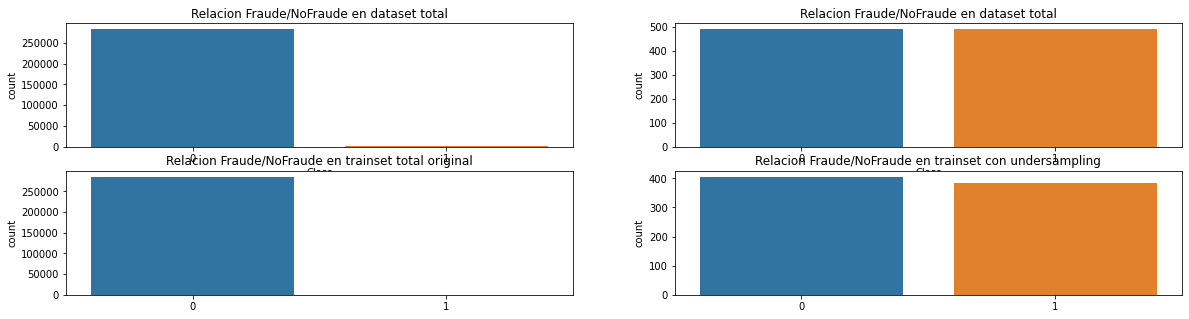

In [338]:
import seaborn as sea

fig, ax = plt.subplots(2,2,figsize=(20,5))

sea.countplot('Class', data=df, ax=ax[0][0])
ax[0][0].set_title('Relacion Fraude/NoFraude en dataset total')
sea.countplot('Class', data=df_u ,ax=ax[0][1])
ax[0][1].set_title('Relacion Fraude/NoFraude en dataset total')
sea.countplot(x=y_test_final, ax=ax[1][0])
ax[1][0].set_title('Relacion Fraude/NoFraude en trainset total original')
sea.countplot(x=y_under_train, ax=ax[1][1])
ax[1][1].set_title('Relacion Fraude/NoFraude en trainset con undersampling')

In [339]:
r2 = model.fit(x_under_train, y_under_train, validation_data=(x_under_test, y_under_test), epochs=200, shuffle=True) #con Undersampling

Epoch 1/200
25/25 [==============================] - 0s 7ms/step - loss: 0.8830 - accuracy: 0.7687 - val_loss: 0.6615 - val_accuracy: 0.9442
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.9403 - val_loss: 0.5023 - val_accuracy: 0.9391
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.9568 - val_loss: 0.4090 - val_accuracy: 0.9492
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.9682 - val_loss: 0.3403 - val_accuracy: 0.9695
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.9784 - val_loss: 0.2948 - val_accuracy: 0.9695
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9835 - val_loss: 0.2544 - val_accuracy: 0.9695
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.2312 - accuracy: 0.9797 - val_loss: 0.2132 - val_accuracy: 0.9797
Epoch 8/200
2

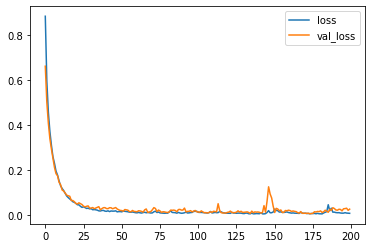

In [340]:
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

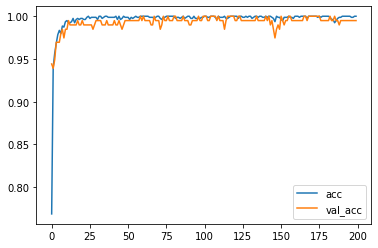

In [341]:
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
y_pred2 = model.predict(x_test_final, batch_size=200)
y_pred2 = y_pred2.reshape(-1,1)
y_pred2 = y_pred2.astype(int)

[[142380 141935]
 [    88    404]]


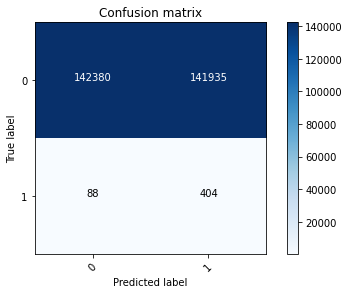

In [343]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_final, y_pred2)
plot_confusion_matrix(cm, list(range(2)))

#anterior [[152435 131880]
#         [   106    386]]
